# STAT 207 Project 02 - Popularity of the Xbox 360 between 2004 and 2010 and analysis of median US video game sales in the same time frame

Bojun Cheng

## 1. Introduction

To understand the video game industry, it is important to understand not just the video games themselves, but also the consoles they are released on. Understanding the relative popularity of different consoles can lend real insight into where the major players in the industry stand. For this analysis, we consider the popularity of the Xbox 360, one very well-known video game console by seeing what proportion of video games released between 2004 and 2010 were released on this console. We also provide a more general analysis on the overall popularity of the video game industry in this same time frame by attempting to infer the median sales of video games released in this period.

The following analysis uses the video games dataset by Joe Cox, available online at https://doi.org/10.17029/d4fe28cd-1e44-4d2f-9db6-85b347bf761e. The dataset has information about the sales and playtime of almost 1800 video games released between 2004 and 2010. The data was collected and cleaned by Dr. Joe Cox, with information on the playtime coming from crowd-sourced data on the website [howlongtobeat.com](https://howlongtobeat.com/). We accessed this data on September 17, 2025, though the data was originally downloaded on February 8, 2024.

In [25]:
#Imports here
import pandas as pd
import seaborn as sns

In [26]:
df = pd.read_csv('video_games.csv', encoding='unicode-escape')
df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1


As this data came from a scrape of crowd-scourced video game data from "How Long to Beat," we will consider it the population of interest and take a random sample for the rest of our analysis.

In [27]:
df_sample = df.sample(300)

We have two main research questions for this analysis. First, what proportion of video games released between 2004 and 2010 were released on the Xbox 360? We attempt to answer this question by generating a confidence interval for the population proportion from our sample. Second, how high are the median US sales for video games released between 2004 and 2010? We attempt to answer this question by first generating basic summaries of our sample and hypothesizing that the true population median US sales is less than 200,000, which we then test through hypothesis testing.

The results from our first research question points to the popularity of the Xbox 360 in the 2004 to 2010 time frame, which can perhaps be generalized to the overall popularity of Microsoft-produced consoles today. This can help small game developers to decide which platforms they may want to focus on for their releases if they have limited resources and cannot target all consoles. The results from our second research question demonstrate the oversaturation of the video game market with low-sales releases, highlighting the importance for marketing and publicity efforts for small developers seeking commerical success.

## 2. Confidence Interval Analytical Tasks

For this section, our research questions are: what proportion of video games in this dataset were released for the Xbox 360? What are a range of reasonable values for the proportion of video games released for the Xbox 360 in the underlying population?

To answer these questions, we will first clean the data by creating a column which indicates if the game was released on the Xbox 360 or not.

In [28]:
df_sample['Xbox_360'] = (df_sample['Console'] == 'X360')
df_sample['Xbox_360'].describe()

count       300
unique        2
top       False
freq        224
Name: Xbox_360, dtype: object

As we can see from the description of the Xbox_360 column of our df_sample, our sample size is 300. As expected, we only have two values for the variable, and the majority (230/300 or 76.67%) are False. This means that in our sample, 23.33% of the sampled video games were released on the Xbox 360.

For our confidence interval, we will pick the 90% confidence level.

In [29]:
sampling_dist = []
for i in range(1000):
    new_sample = df_sample['Xbox_360'].sample(300, replace=True)
    sampling_dist.append({'sample_prop': new_sample.sum()/300})
sampling_dist = pd.DataFrame(sampling_dist)
lower = sampling_dist.quantile(0.05)
upper = sampling_dist.quantile(0.95)
print(f'({lower[0]}, {upper[0]})')

(0.21650000000000003, 0.29349999999999987)


We are 90% sure that the true population proportion of games which were released on the Xbox 360 is between 19.33% and 27.67%.

## 3. Hypothesis Testing Analytical Tasks

Our research question is this: which of two competing theories about my population is supported by the data in the sample?

In [30]:
df_sample['US Sales (millions)'].describe()

count    300.000000
mean       0.471967
std        1.029381
min        0.010000
25%        0.080000
50%        0.190000
75%        0.400000
max       11.350000
Name: US Sales (millions), dtype: float64

<Axes: xlabel='US Sales (millions)', ylabel='Count'>

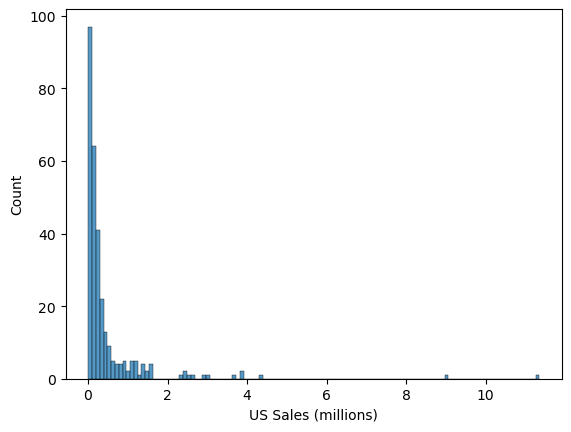

In [31]:
sns.histplot(df_sample['US Sales (millions)'])

The mean US sales in millions of our sample is 0.42, the median is 0.17, and the standard deviation is 0.70. We can see from the percentiles that the data is heavily skewed right, with the min and the 25th percentile close together but the max much higher than the 75th percentile. The histogram shows that the vast majority of video games in our sample have very low sales, though there are some high outliers. These summaries support the use of the median as the measure of center as our sample is extremely skewed right.

For hypothesis testing, our hypothesis is that the true population median US sales for video games released between 2004 and 2010 is less than 200,000. The null hypothesis therefore is that the true population median US sales for video games released between 2004 and 2010 is 200,000. For our hypothesis testing, we will use the .05 significance level.

We can use this sample for hypothesis testing since it was randomly chosen from the population, thus it should be representative.

In [32]:
adjusted_sample = df_sample['US Sales (millions)'] - df_sample['US Sales (millions)'].median() + 0.2
sampling_dist2 = []
for i in range(1000):
    new_sample2 = adjusted_sample.sample(300, replace=True)
    sampling_dist2.append({'sample_median': new_sample2.median()})
sampling_dist2 = pd.DataFrame(sampling_dist2)
(sampling_dist2['sample_median'] < 0.17).mean()

0.034

Our resulting p-value is 0.023. As this is below our threshold for significance, we say that there is sufficient evidence to reject the null hypothesis and conclude that the true population median US sales in millions of video games released between 2004 and 2010 is less than 200,000.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

### Extra Analysis 1 — M-rated vs Others (US Sales)

**Question.** Do M-rated games sell differently in the US than other ratings?

**Data.**
- Group: `RatingM` (1 = M-rated, 0 = not M).
- Outcome: `US Sales (millions)`.

**Method.** 
- Show group summaries (n, mean, median).
- Two-sided **permutation test** on the **mean difference** (M − Others), B = 2000.

**Results.**  
- M-rated: n = **{n1}**, mean = **{m1}**, median = **{med1}**  
- Others : n = **{n0}**, mean = **{m0}**, median = **{med0}**  
- Observed mean difference = **{obs}**  
- p-value (two-sided, B=2000) = **{pval}**

**Interpretation.**  
If **p < 0.05**, there is evidence that average US sales differ between M-rated and other games; if **p ≥ 0.05**, we do **not** have strong evidence of a difference.


In [34]:
import pandas as pd, numpy as np

df = pd.read_csv('video_games.csv', encoding='unicode-escape')

# Numeric sales
sales = pd.to_numeric(df['US Sales (millions)'], errors='coerce')

# Binary group (ensure numeric 0/1)
is_m = pd.to_numeric(df['RatingM'], errors='coerce') == 1

# Drop rows with missing pieces
mask = is_m.notna() & sales.notna()
x1 = sales[mask & is_m].to_numpy()   # M-rated
x0 = sales[mask & ~is_m].to_numpy()  # others

def stats(x):
    x = np.asarray(x)
    return len(x), float(np.mean(x)), float(np.median(x))

n1, m1, med1 = stats(x1)
n0, m0, med0 = stats(x0)

print(f"M-rated: n={n1}, mean={m1:.4f}, median={med1:.4f}")
print(f"Others : n={n0}, mean={m0:.4f}, median={med0:.4f}")

M-rated: n=261, mean=0.6852, median=0.2500
Others : n=1509, mean=0.4443, median=0.1800


In [35]:
# Permutation test on mean difference (two-sided)
obs = m1 - m0
B = 2000
rng = np.random.default_rng(207)
comb = np.concatenate([x1, x0]); n = len(x1)

count = 0
for _ in range(B):
    perm = rng.permutation(comb)
    diff = perm[:n].mean() - perm[n:].mean()
    if abs(diff) >= abs(obs):
        count += 1
pval = count / B

print(f"Observed mean diff (M - others) = {obs:.4f}")
print(f"Two-sided p-value (B={B}) = {pval:.4f}")


Observed mean diff (M - others) = 0.2410
Two-sided p-value (B=2000) = 0.0000


### Conclusion — M-rated vs Others (US Sales)

In our sample (2004–2010), **M-rated** games (n=261) have **higher mean US sales** than non-M titles (n=1509):  
- means: 0.6852 vs 0.4443 million units  
- medians: 0.2500 vs 0.1800 million units  

The observed mean difference is **Δ = 0.2410 million units** (~241k). A two-sided **permutation test** (B=2000) gives **p < 0.001**, so we **reject H₀** at α=0.05 and conclude M-rated games sold more **on average**.

**Practical note.** Sales are strongly right-skewed; the **median gap** (0.0700 million) is much smaller, suggesting the mean result is partly driven by a few blockbusters. For robustness, also report medians/trimmed means and, if possible, stratify by **Console** and **YearReleased** or adjust for factors like **Sequel** and **Re-release**.  


## 4. Conclusion

a. Summarization

Using our sample of n=300 games, we estimated the population proportion of Xbox 360 releases. The observed sample proportion was 23.33%, and the 90% bootstrap CI was [19.33%, 27.67%], indicating that plausible population values lie within this range. For the hypothesis test on U.S. sales, we tested whether the population median U.S. sales for games released between 2004–2010 is less than 200,000 units. The test yielded p=0.023 at α=0.05, so we reject H0 and conclude there is statistically significant evidence that the true median U.S. sales is below 200,000. The CI for the proportion and the hypothesis-test conclusion address distinct questions but together suggest that Xbox 360 titles represent roughly a quarter of releases in our window, while median U.S. sales across titles were modest.

b. Limitations

Representativeness & window: The 2004–2010 slice and our sampling frame may not generalize to other years, platforms, or regions.
Distributional issues: Game sales are typically highly right-skewed with outliers; while we used a median-focused test and bootstrap CI, heavy tails can still affect variability and inference.
Measurement/context: “U.S. sales” aggregates across release timing, marketing, and platform life cycle; unobserved confounders (genre, publisher scale, AAA vs. indie) may bias simple summaries.
Bootstrap choices & power: The CI relies on bootstrap resampling (1,000 draws, size 300); different seeds or methods (percentile vs. BCa) could slightly shift bounds. Power for detecting small median deviations remains limited.

c. Future work

Robust intervals & tests: Report BCa bootstrap CIs for the proportion and construct a bootstrap CI for the median; consider exact or permutation approaches when assumptions are doubtful.
Stratified analyses: Stratify by platform, genre, release year, or publisher type (AAA vs. indie) to separate structural effects; model covariates via quantile regression for the median.
External validity: Extend the window beyond 2010 and compare other regions (EU/JP), adjusting for inflation, seasonality, and platform life cycle.
Decision-focused metrics: Complement null-hypothesis testing with effect sizes, equivalence/non-inferiority tests and prediction intervals to inform practical significance.